# K nearest neighbour

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [27]:
data = np.array([[.8,.8,1], [1,1,1],[1.2,0.8,1], [.8,1.2,1], [1.2,1.2,1], [4,3,2], [3.8,2.8,2], [4.2,2.8,2], [3.8,3.2,2], [4.2,3.2,2], [4.4,2.8,2], [4.4,3.2,2], [3.2,0.4,3], [3.2,0.7,3], [3.8,0.5,3], [3.5,1,3], [4,1,3], [4,7,3]])

In [28]:
#Shuffling the dataset
np.random.shuffle(data)

In [29]:
X = data[:,0:2]
y = data[:,2]

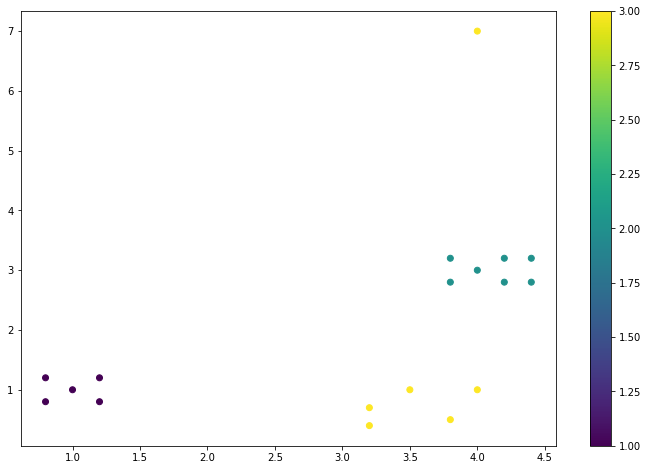

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

# Applying 3-fold cross validation with K values (1,8)

In [33]:
fold = 3
length = len(X)
partition = 6
accuracies = np.zeros(7)
for k in range(1,8):
    K = k
    sum_acc = 0
    for i in range(0,length, partition):
        X_cv = np.zeros((partition, 2))
        y_cv = np.zeros((partition, 1))
        X_train = np.zeros((length - partition, 2))
        y_train = np.zeros((length - partition, 1))
        b = 0
        for a in range(i, i + partition):
            X_cv[b] = X[a,:]
            y_cv[b] = y[a]
            b = b + 1
        b = 0
        for a in range(0, length):
            if a in range(i, i + partition):
                continue
            X_train[b] = X[a,:]
            y_train[b] = y[a]
            b = b + 1
                
        sum = 0

        for j in range(0, partition):
            example = X_cv[j,:]
            distance = np.zeros(12)
            for a in range(0, 12):
                distance[a] = math.pow(X_train[a,0] - example[0], 2) + math.pow(X_train[a,1] - example[1], 2)
       

            sorted_class = y_train
            
            for a in range(0, 12):
                for b in range(a, 12):
                    if distance[b] > distance[a]:
                        distance[b], distance[a] = distance[a], distance[b]
                        sorted_class[b], sorted_class[a] = sorted_class[a], sorted_class[b]

            votes = np.unique(sorted_class[:K,0], return_counts=True)
            temp = np.array(votes[1])
            max_count_index = temp.argmax()
            belong = votes[0][max_count_index]
            
            
            if(belong == y_cv[j]):
                sum = sum + 1

        sum_acc = sum_acc + sum/(partition)
    result = sum_acc/(length/partition)
    print("Ac",result)
    accuracies[k-1] = result  

Ac 0.3333333333333333
Ac 0.3333333333333333
Ac 0.3333333333333333
Ac 0.3333333333333333
Ac 0.38888888888888884
Ac 0.38888888888888884
Ac 0.38888888888888884


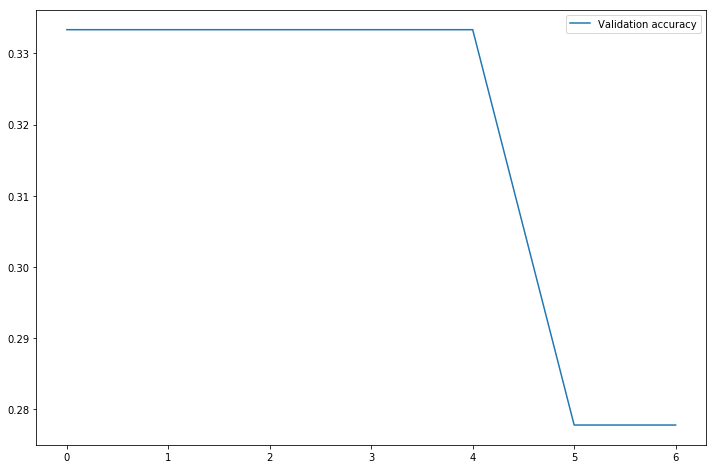

In [19]:
plt.figure(figsize=(12,8))
plt.plot(accuracies)
plt.legend(['Validation accuracy'])

In [25]:
sorted_class[:K]

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 1.]])